In [13]:
import pandas as pd  # Pandas: Handles tabular data (like Excel in Python)
import numpy as np  # NumPy: Provides numerical operations and arrays
import matplotlib.pyplot as plt  # Matplotlib: Basic plotting library
import seaborn as sns  # Seaborn: Makes statistical visualizations prettier
import sqlite3  # SQLite: Allows us to work with SQL databases in Python

In [15]:
# Connect to the SQLite database file
con = sqlite3.connect("python.db")

# Run an SQL query to get the "heart" dataset as a DataFrame
heart_df = pd.read_sql_query("SELECT * FROM heart", con)

# Close the connection to save resources
con.close()

# Check the first 5 rows to verify we loaded the data correctly
heart_df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Check the type of heart_df
type(heart_df)

pandas.core.frame.DataFrame

In [19]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

In [25]:
# First 5 rows
heart_df.head()

# Last 5 rows
heart_df.tail()

# Summary of the dataset (columns, non-null values, data types)
heart_df.info()

# Data types of each column
heart_df.dtypes

# Shape of dataset (rows, columns)
heart_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


(303, 15)

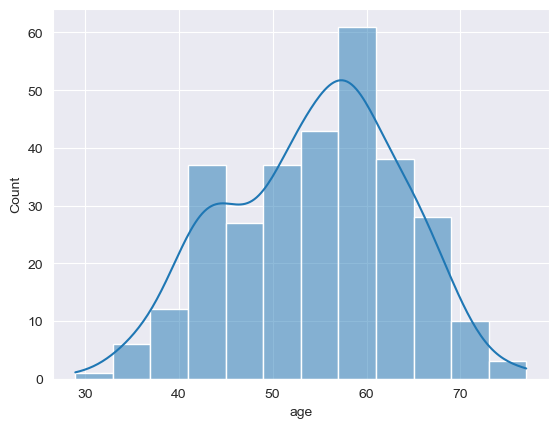

In [27]:
sns.set_style('darkgrid')  # Set the background style

# Create a histogram of the age column
sns.histplot(data=heart_df, x='age', kde=True)

plt.show()  # Show the plot

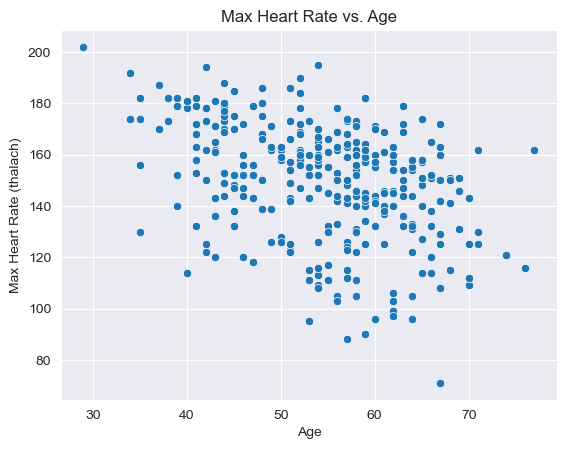

In [29]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach'])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Max Heart Rate vs. Age")
plt.show()

In [31]:
# Missing rows as a dictionary
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}

# Convert to DataFrame
missing = pd.DataFrame(extra_rows)

# Concatenate with the original DataFrame
heart_augmented = pd.concat([heart_df, missing], ignore_index=True)

# Check the last rows to confirm addition
heart_augmented.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,300.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,302.0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,NaN,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,NaN,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [33]:
# Add a new column called 'test' and set all values to 0
heart_augmented['test'] = 0

# Add a column summing cholesterol and resting blood pressure
heart_augmented['chol_trestbps_sum'] = heart_augmented['chol'] + heart_augmented['trestbps']

# Check the first 5 rows
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_trestbps_sum
0,0.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,2.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,3.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,4.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


In [35]:
# Filter for patients who are 70 or older OR have a resting blood pressure over 170
at_risk = heart_augmented[(heart_augmented['age'] >= 70) | (heart_augmented['trestbps'] > 170)]

# Display the results
at_risk.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_trestbps_sum
8,8.0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,371
25,25.0,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,60.0,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
101,101.0,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,0,448
110,110.0,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,0,505


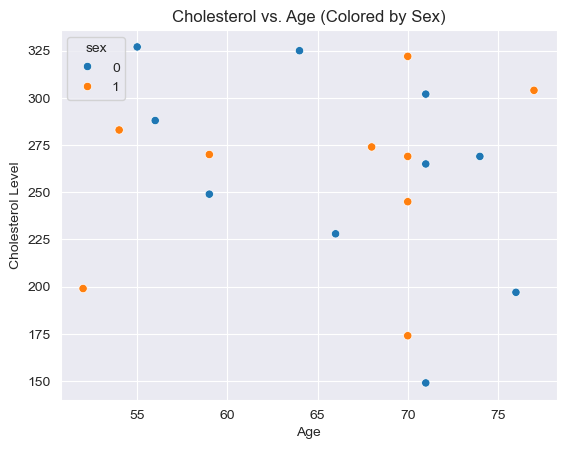

In [37]:
sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex')

plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol vs. Age (Colored by Sex)")
plt.show()

In [39]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


In [41]:
heart_augmented.iloc[:10, [0, 3]]

,id,cp
0,0.0,3
1,1.0,2
2,2.0,1
3,3.0,1
4,4.0,0
5,5.0,0
6,6.0,1
7,7.0,1
8,8.0,2
9,9.0,2


In [43]:
# Mean (average)
heart_augmented.mean()

# Minimum value
heart_augmented.min()

# Maximum value
heart_augmented.max()

id                   302.0
age                   77.0
sex                    1.0
cp                     3.0
trestbps             200.0
chol                 564.0
fbs                    1.0
restecg                2.0
thalach              202.0
exang                  1.0
oldpeak                6.2
slope                  2.0
ca                     4.0
thal                   3.0
target                 1.0
test                   0.0
chol_trestbps_sum    679.0
dtype: float64

In [45]:
heart_augmented['slope'].value_counts()
heart_augmented['sex'].value_counts()
heart_augmented['target'].value_counts()

target
1    165
0    140
Name: count, dtype: int64

In [51]:
# Sorting by age
heart_augmented['age'].sort_values()

72     29
304    30
58     34
125    34
65     35
       ..
25     71
60     71
129    74
144    76
238    77
Name: age, Length: 305, dtype: int64

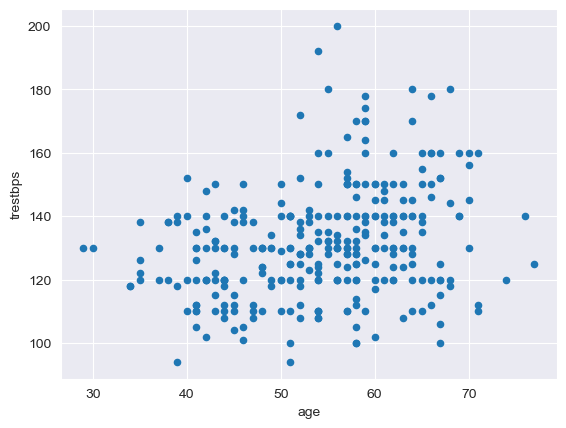

In [53]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter')
plt.show()

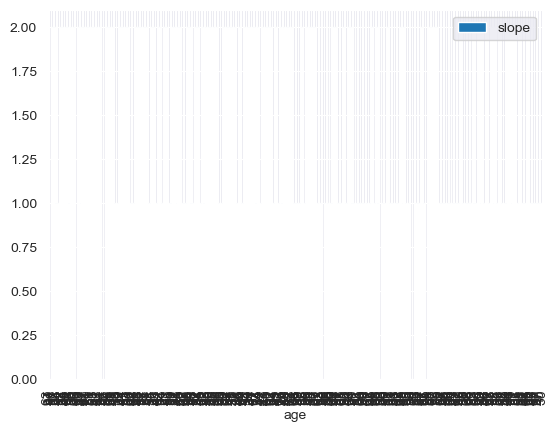

In [55]:
heart_augmented.plot(x='age', y='slope', kind='bar')
plt.show()

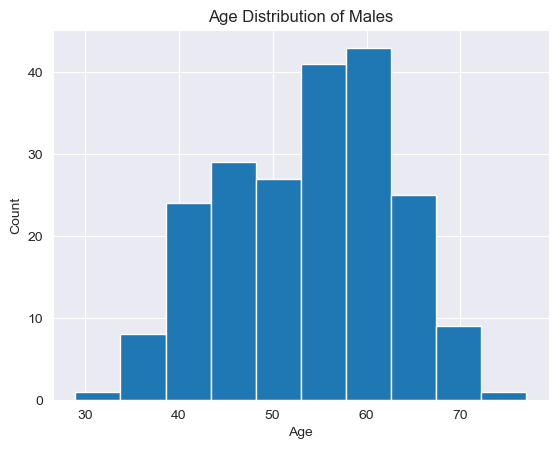

In [57]:
heart_augmented[heart_augmented['sex'] == 1]['age'].hist()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Males")
plt.show()

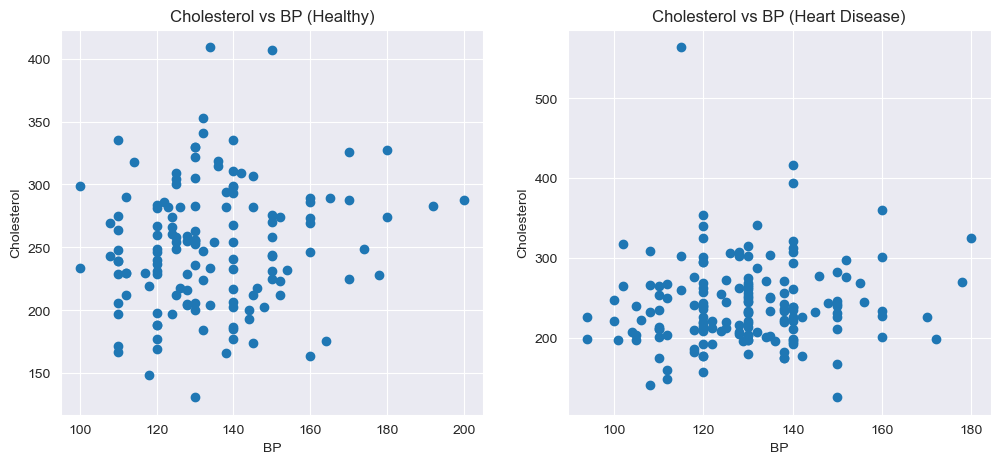

In [59]:
# Subset for healthy patients (target=0)
healthy = heart_augmented[heart_augmented['target'] == 0]

# Subset for heart disease patients (target=1)
disease = heart_augmented[heart_augmented['target'] == 1]

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Healthy patients plot
axes[0].scatter(healthy['trestbps'], healthy['chol'])
axes[0].set_title("Cholesterol vs BP (Healthy)")
axes[0].set_xlabel("BP")
axes[0].set_ylabel("Cholesterol")

# Heart disease patients plot
axes[1].scatter(disease['trestbps'], disease['chol'])
axes[1].set_title("Cholesterol vs BP (Heart Disease)")
axes[1].set_xlabel("BP")
axes[1].set_ylabel("Cholesterol")

plt.show()